In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.shape

(569, 31)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size=0.2, random_state=2022, stratify = cancer.target
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((455, 30), (114, 30), (455,), (114,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs= 500, batch_size=100)

Epoch 1/500
4/4 [==============================] - 4s 154ms/step - loss: 17.5215 - accuracy: 0.4176 - val_loss: 4.9075 - val_accuracy: 0.6923
Epoch 2/500
4/4 [==============================] - 0s 20ms/step - loss: 6.5751 - accuracy: 0.6566 - val_loss: 1.3056 - val_accuracy: 0.8462
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 1.6097 - accuracy: 0.7225 - val_loss: 3.6616 - val_accuracy: 0.4176
Epoch 4/500
4/4 [==============================] - 0s 18ms/step - loss: 2.3649 - accuracy: 0.5907 - val_loss: 0.6110 - val_accuracy: 0.9231
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 1.5289 - accuracy: 0.8626 - val_loss: 1.3484 - val_accuracy: 0.8462
Epoch 6/500
4/4 [==============================] - 0s 25ms/step - loss: 0.9553 - accuracy: 0.8819 - val_loss: 0.5854 - val_accuracy: 0.8571
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0299 - accuracy: 0.7527 - val_loss: 0.7887 - val_accuracy: 0.8022
Epoch 8/500
4/4 [=

In [ ]:
history

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2086 - accuracy: 0.9298


[0.2085944563150406, 0.9298245906829834]

In [ ]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

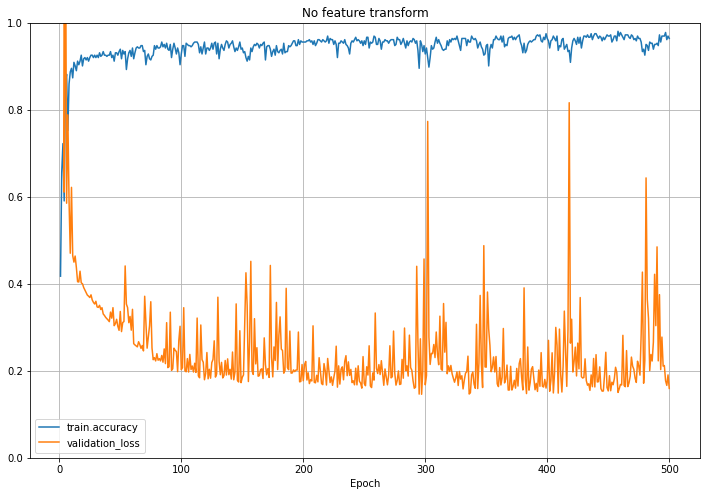

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label = 'validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

2. 데이터를 정규 / 표준화 한 경우

In [ ]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)
X_train_sc , X_test_sc , y_train, y_test = train_test_split(
    cancer_std, cancer.target, test_size=0.2, stratify=cancer.target, random_state=2022
)

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
history2 = model2.fit(X_train_sc, y_train, validation_split=0.2,
                     epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 0s 18ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1879 - val_accuracy: 0.9451
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1892 - val_accuracy: 0.9451
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1899 - val_accuracy: 0.9451
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.1906 - val_accuracy: 0.9451
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1912 - val_accuracy: 0.9451
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1914 - val_accuracy: 0.9451
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1922 - val_accuracy: 0.9451
Epoch 8/100
4/4 [=====

In [ ]:
model2.evaluate(X_test_sc, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9912


[0.04002845659852028, 0.9912280440330505]

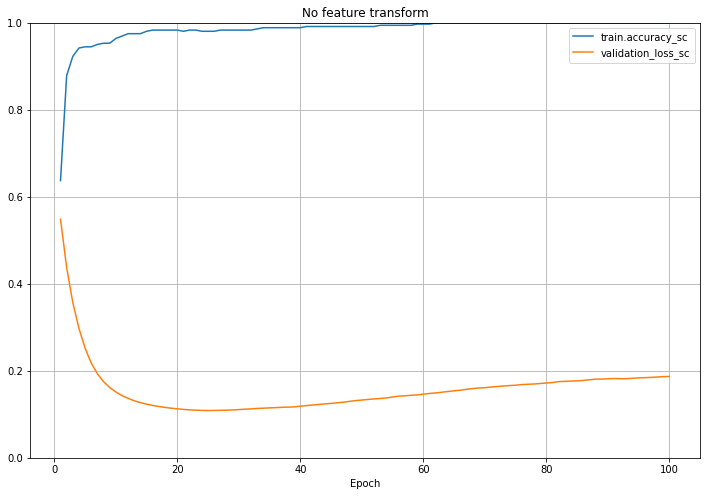

In [ ]:
y_acc_sc = history.history['accuracy']
y_vloss_sc = history.history['val_loss']
xs = np.arange(1, len(y_acc_sc) + 1)
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc_sc, label='train.accuracy_sc')
plt.plot(xs, y_vloss_sc, label = 'validation_loss_sc')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

# 다중분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [ ]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)

In [ ]:
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(
    wine_std, Y, random_state=2022, stratify= Y, test_size=0.2
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(30, input_dim=13, activation='relu',),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 다중분류

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
hist1 = model.fit(X_train, y_train, validation_split=0.2,
                epochs=100, batch_size=100, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1301 - accuracy: 0.9722


[0.1300567239522934, 0.9722222089767456]

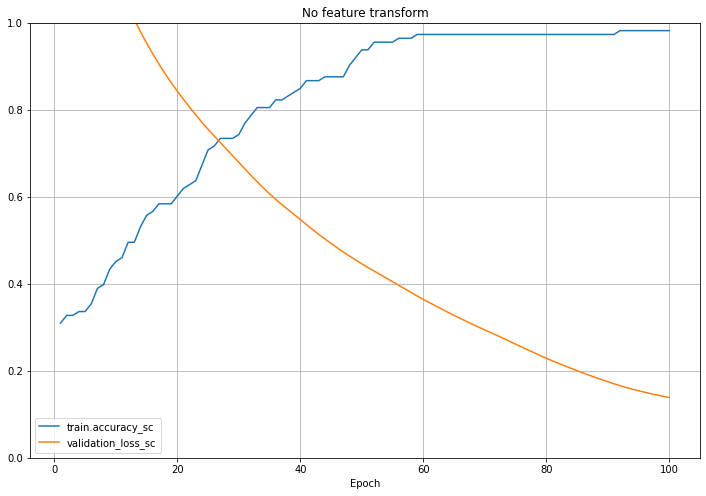

In [ ]:
y_acc = hist1.history['accuracy']
y_vloss = hist1.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train.accuracy_sc')
plt.plot(xs, y_vloss, label = 'validation_loss_sc')
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [ ]:
model2 = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [ ]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=500, batch_size=100, verbose=0)

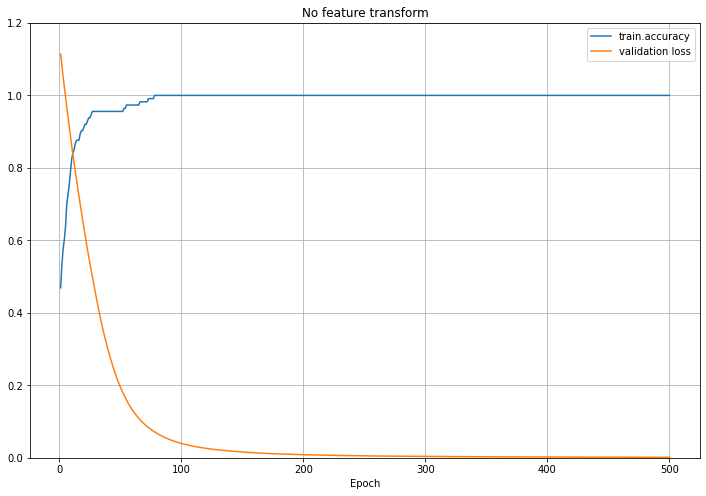

In [ ]:
y_acc12 = hist2.history['accuracy']
y_vloss12 = hist2.history['val_loss']
xs = np.arange(1, len(y_acc12) + 1)
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc12, label='train.accuracy')
plt.plot(xs, y_vloss12, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [ ]:
model2.save('wind.h5')

In [ ]:
!ls -l

total 48
drwxr-xr-x 1 root root  4096 Oct  7 13:35 sample_data
-rw-r--r-- 1 root root 43704 Oct 13 02:13 wind.h5


In [ ]:
from tensorflow.keras.models import load_model
my_model = load_model('wind.h5')

In [ ]:
my_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 1.0000


[0.0018801080295816064, 1.0]

In [ ]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [ ]:
my_model.evaluate(wine_std[100].reshape(1, -1), Y[100].reshape(1, -1))

1/1 [==============================] - 0s 23ms/step - loss: 2.5153e-05 - accuracy: 1.0000


[2.5152843591058627e-05, 1.0]

# 캘리포니아 하우징

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing()

In [ ]:
df = pd.DataFrame(house.data, columns = house.feature_names)
df['target'] = house.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    house.data, house.target, test_size=0.1, random_state=seed
)

In [ ]:
del model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(20,input_dim = 8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1) # 회귀에서는 출력층에 활성화 함수 사용 X
])

In [ ]:
model.compile('adam', 'mean_squared_error') # 회귀에서는 메트릭스 정의 X

In [ ]:
hist1 = model.fit(X_train, y_train, validation_split = 0.1,
                  epochs=100, batch_size=256, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.6362


0.6361977458000183

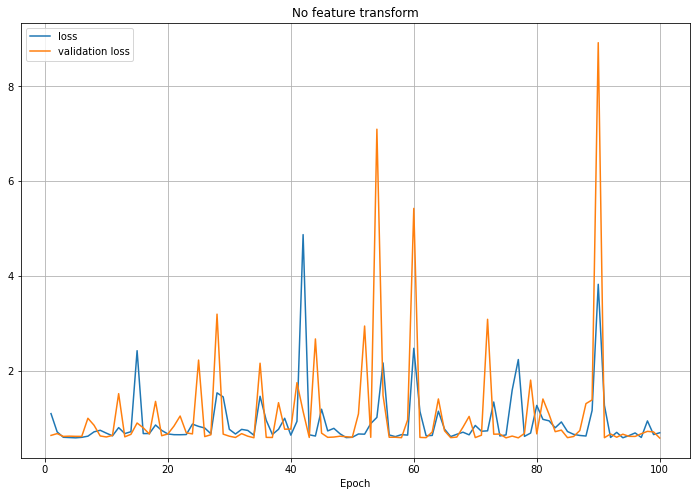

In [ ]:
y_loss = hist1.history['loss']
y_vloss = hist1.history['val_loss']
xs = np.arange(1, len(y_loss) + 1)
plt.figure(figsize=(12, 8))
plt.plot(xs, y_loss, label='loss')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
# plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [ ]:
pred = model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, pred)

65/65 [==============================] - 0s 1ms/step


0.504295298577242

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
mean_squared_error(y_test, pred)

0.6361976667520474

In [ ]:
dft = pd.DataFrame({'y_test' : y_test, 'pred': pred.reshape(-1)})
dft.head()

,y_test,pred
0,4.771,4.383294
1,1.371,1.487298
2,1.233,1.716851
3,0.938,1.554040
4,3.260,3.083520


# 과적합 피하기

In [ ]:
from google.colab import files
up = files.upload()

Saving sonar_csv.csv to sonar_csv.csv


In [ ]:
df = pd.read_csv('sonar_csv.csv')
df.columns = range(0,61)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


In [ ]:
df[60].value_counts()

Mine    111
Rock     97
Name: 60, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df[df.columns[:-1]].values)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df[60].values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, test_size=0.2, stratify= y_labeled, random_state=seed
)

In [ ]:
del moodel

NameError: ignored

In [ ]:
model = Sequential([
    Dense(80, input_dim = 60, activation='relu'),
    Dense(12, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 80)                4880      
                                                                 
 dense_22 (Dense)            (None, 12)                972       
                                                                 
 dense_23 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
hist1 = model.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size = 100, verbose=0)

In [ ]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.3491 - accuracy: 0.8810


[0.3490704894065857, 0.8809523582458496]

In [ ]:
params1, acc1 = 5865, 0.8809

In [ ]:
model2 = Sequential([
    Dense(128, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 128)               7808      
                                                                 
 dense_35 (Dense)            (None, 64)                8256      
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 8)                 264       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,417
Trainable params: 18,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=200, batch_size=100, verbose=0)

In [ ]:
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.4050 - accuracy: 0.8810


[0.4049522280693054, 0.8809523582458496]

In [ ]:
params2, acc2 = 18417, 0.8809

In [ ]:
model3 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),        
    Dense(24, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [ ]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 80)                4880      
                                                                 
 dense_40 (Dense)            (None, 64)                5184      
                                                                 
 dense_41 (Dense)            (None, 40)                2600      
                                                                 
 dense_42 (Dense)            (None, 24)                984       
                                                                 
 dense_43 (Dense)            (None, 10)                250       
                                                                 
 dense_44 (Dense)            (None, 4)                 44        
                                                                 
 dense_45 (Dense)            (None, 1)               

In [ ]:
model3.compile('adam', 'binary_crossentropy', ['accuracy'])
hist3 = model3.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [ ]:
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.9165 - accuracy: 0.8095


[0.9164716005325317, 0.8095238208770752]

In [ ]:
params3, acc3 = 13947, 0.8095

In [ ]:
model4 = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(64, activation='relu'),
    Dense(48, activation='relu'),    
    Dense(36, activation='relu'),        
    Dense(28, activation='relu'),
    Dense(16, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid'),  
])
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 80)                4880      
                                                                 
 dense_47 (Dense)            (None, 64)                5184      
                                                                 
 dense_48 (Dense)            (None, 48)                3120      
                                                                 
 dense_49 (Dense)            (None, 36)                1764      
                                                                 
 dense_50 (Dense)            (None, 28)                1036      
                                                                 
 dense_51 (Dense)            (None, 16)                464       
                                                                 
 dense_52 (Dense)            (None, 4)               

In [ ]:
model4.compile('adam', 'binary_crossentropy', ['accuracy'])
hist4 = model4.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=0)

In [ ]:
model4.evaluate(X_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.9614 - accuracy: 0.8333


[0.9613779187202454, 0.8333333134651184]

In [ ]:
params3, acc3 = 16521, 0.8333

In [ ]:
y_acc1 = hist1.history['accuracy']
y_acc2 = hist2.history['accuracy']
y_acc3 = hist3.history['accuracy']
y_acc4 = hist4.history['accuracy']
y_vloss1 = hist1.history['val_loss']
y_vloss2 = hist2.history['val_loss']
y_vloss3 = hist3.history['val_loss']
y_vloss4 = hist4.history['val_loss']
xs = np.arange(1, len(y_acc1) + 1)

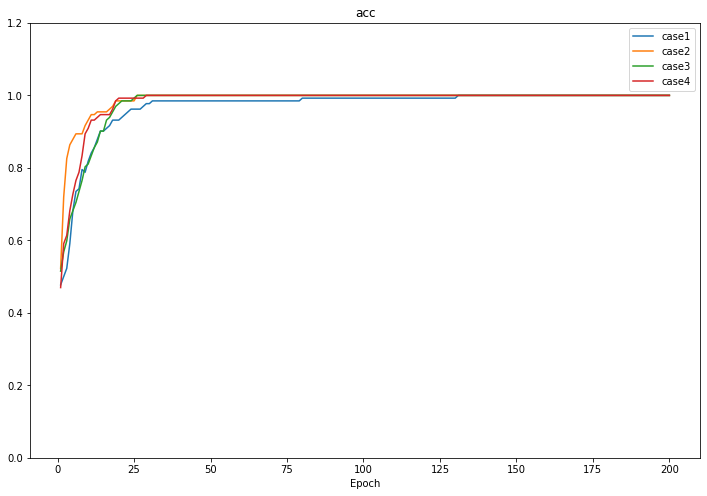

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(xs, y_acc1, label='case1')



plt.plot(xs, y_acc2, label='case2')



plt.plot(xs, y_acc3, label='case3')

plt.legend(), plt.grid()


plt.plot(xs, y_acc4, label='case4')

plt.legend(), plt.grid()

plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('acc')



plt.show()

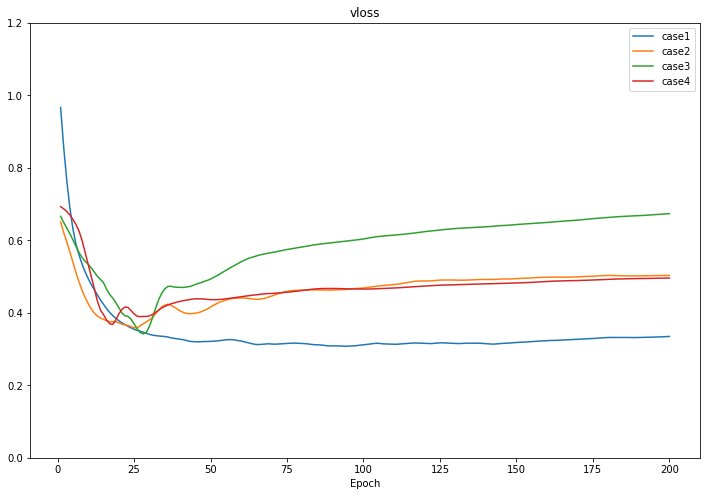

In [ ]:
plt.figure(figsize=(12, 8))


plt.plot(xs, y_vloss1, label='case1')



plt.plot(xs, y_vloss2, label='case2')



plt.plot(xs, y_vloss3, label='case3')
plt.legend(), plt.grid()



plt.plot(xs, y_vloss4, label='case4')
plt.legend(), plt.grid()

plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('vloss')



plt.show()

In [ ]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [ ]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss',
                     verbose=1, save_best_only = True)

In [ ]:
hist =  model.fit(X_train, y_train, validation_split=0.2,
                  epochs=200, batch_size=100, verbose=0,
                  callbacks=[mc])


Epoch 1: val_loss improved from inf to 0.68726, saving model to sonar_best.h5

Epoch 2: val_loss improved from 0.68726 to 0.66609, saving model to sonar_best.h5

Epoch 3: val_loss improved from 0.66609 to 0.64972, saving model to sonar_best.h5

Epoch 4: val_loss improved from 0.64972 to 0.63728, saving model to sonar_best.h5

Epoch 5: val_loss improved from 0.63728 to 0.62613, saving model to sonar_best.h5

Epoch 6: val_loss improved from 0.62613 to 0.61564, saving model to sonar_best.h5

Epoch 7: val_loss improved from 0.61564 to 0.60500, saving model to sonar_best.h5

Epoch 8: val_loss improved from 0.60500 to 0.59313, saving model to sonar_best.h5

Epoch 9: val_loss improved from 0.59313 to 0.58010, saving model to sonar_best.h5

Epoch 10: val_loss improved from 0.58010 to 0.56719, saving model to sonar_best.h5

Epoch 11: val_loss improved from 0.56719 to 0.55504, saving model to sonar_best.h5

Epoch 12: val_loss improved from 0.55504 to 0.54255, saving model to sonar_best.h5

Epoc

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')

best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6192 - accuracy: 0.8095


[0.6192482709884644, 0.8095238208770752]

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

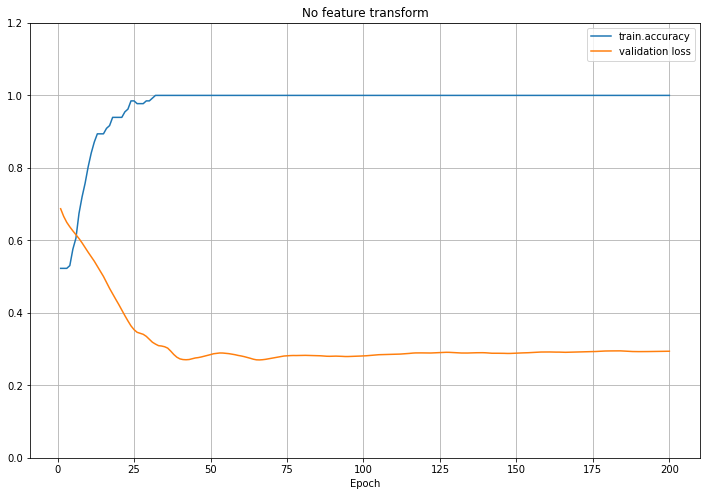

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [ ]:
model = Sequential([
    Dense(80, input_dim=60, activation='relu'),
    Dense(48, activation='relu'),
    Dense(20, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),  
])

In [ ]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint('sonar_best.h5', monitor='val_loss',
                     verbose=1, save_best_only = True)
es = EarlyStopping(patience= 20)

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.2,
          epochs=200, batch_size=100, verbose=1,
          callbacks=[mc, es])

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 0.7025 - accuracy: 0.5300
Epoch 1: val_loss improved from inf to 0.67586, saving model to sonar_best.h5
2/2 [==============================] - 1s 292ms/step - loss: 0.7081 - accuracy: 0.5227 - val_loss: 0.6759 - val_accuracy: 0.6471
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6753 - accuracy: 0.6000
Epoch 2: val_loss improved from 0.67586 to 0.65614, saving model to sonar_best.h5
2/2 [==============================] - 0s 88ms/step - loss: 0.6728 - accuracy: 0.6136 - val_loss: 0.6561 - val_accuracy: 0.7059
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6559 - accuracy: 0.6500
Epoch 3: val_loss improved from 0.65614 to 0.64004, saving model to sonar_best.h5
2/2 [==============================] - 0s 62ms/step - loss: 0.6484 - accuracy: 0.6742 - val_loss: 0.6400 - val_accuracy: 0.7353
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 0.6384 - accuracy: 0.6900
E

In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('sonar_best.h5')

best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.5698 - accuracy: 0.8810


[0.5698437690734863, 0.8809523582458496]

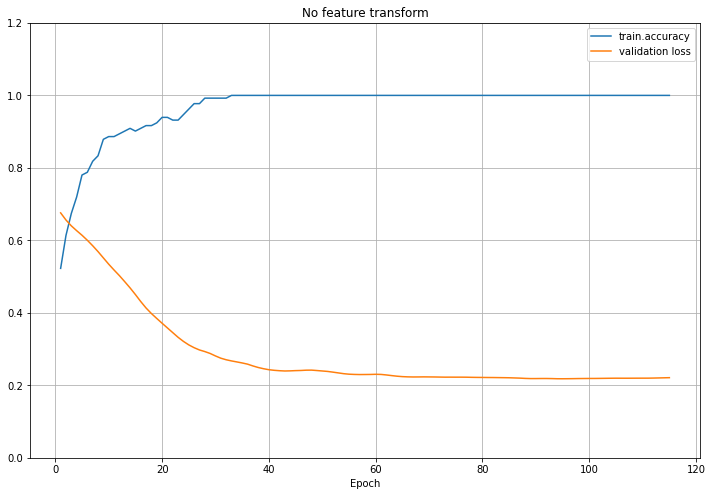

In [ ]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)


plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

# 다중분류


In [146]:
from sklearn.datasets import load_iris
iris = load_iris()


from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)

In [148]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [147]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(iris.target)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, Y, stratify = Y, test_size=0.2,
    random_state=2022
)

In [151]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [152]:
iris.data.shape

(150, 4)

In [153]:
np.unique(iris.target)

array([0, 1, 2])

In [155]:
model = Sequential([
    Dense(32, input_dim=4, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 32)                160       
                                                                 
 dense_65 (Dense)            (None, 16)                528       
                                                                 
 dense_66 (Dense)            (None, 8)                 136       
                                                                 
 dense_67 (Dense)            (None, 3)                 27        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [157]:
mc = ModelCheckpoint('iris_best.h5', monitor='val_loss', verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)

In [158]:
hist = model.fit(X_train, y_train, validation_split=0.2,
                 epochs=10000, batch_size=100, verbose=0,
                 callbacks=[es,mc])


Epoch 1: val_loss improved from inf to 1.18666, saving model to iris_best.h5

Epoch 2: val_loss improved from 1.18666 to 1.16920, saving model to iris_best.h5

Epoch 3: val_loss improved from 1.16920 to 1.15269, saving model to iris_best.h5

Epoch 4: val_loss improved from 1.15269 to 1.13696, saving model to iris_best.h5

Epoch 5: val_loss improved from 1.13696 to 1.12199, saving model to iris_best.h5

Epoch 6: val_loss improved from 1.12199 to 1.10760, saving model to iris_best.h5

Epoch 7: val_loss improved from 1.10760 to 1.09324, saving model to iris_best.h5

Epoch 8: val_loss improved from 1.09324 to 1.07942, saving model to iris_best.h5

Epoch 9: val_loss improved from 1.07942 to 1.06636, saving model to iris_best.h5

Epoch 10: val_loss improved from 1.06636 to 1.05439, saving model to iris_best.h5

Epoch 11: val_loss improved from 1.05439 to 1.04347, saving model to iris_best.h5

Epoch 12: val_loss improved from 1.04347 to 1.03243, saving model to iris_best.h5

Epoch 13: val_lo

In [159]:
best_model = load_model('iris_best.h5')
best_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.2280 - accuracy: 0.9000


[0.2279573231935501, 0.8999999761581421]

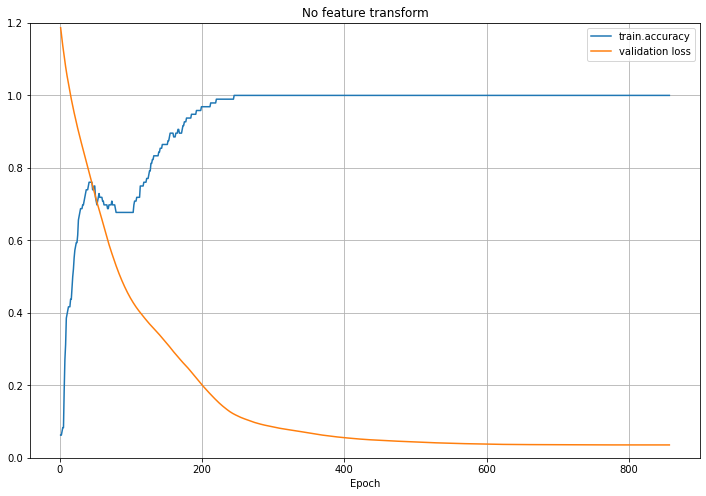

In [162]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)


plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

#MNIST 손글씨 분류 - 신경망

In [164]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

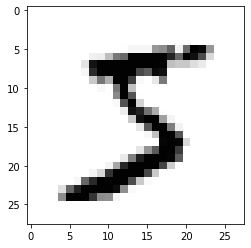

In [166]:
plt.imshow(X_train[0], cmap='Greys')

In [167]:
import sys

for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [168]:
X_train = X_train / 255.
X_test = X_test / 255.

In [170]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(-1, 28 * 28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [171]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [172]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [173]:
y_train.shape

(60000, 10)

In [175]:
from tensorflow.keras.models import load_model, Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [187]:
del model

In [188]:
model1 = Sequential([
    Dense(1024, input_dim=784, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dense(48, activation='relu'),
    Dense(10, activation='softmax')
])

In [189]:
model1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_77 (Dense)            (None, 256)               262400    
                                                                 
 dense_78 (Dense)            (None, 48)                12336     
                                                                 
 dense_79 (Dense)            (None, 10)                490       
                                                                 
Total params: 1,079,066
Trainable params: 1,079,066
Non-trainable params: 0
_________________________________________________________________


In [190]:
model1.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [191]:
mc = ModelCheckpoint('mnist_best.h5', monitor='val_loss',
                     verbose=1, save_best_only=True)
es = EarlyStopping(patience=30)

In [192]:
hist = model1.fit(X_train, y_train, validation_split=0.2,
                    epochs=2000, batch_size= 100, 
                    callbacks=[mc, es])

Epoch 1/2000
478/480 [============================>.] - ETA: 0s - loss: 0.2576 - accuracy: 0.9220
Epoch 1: val_loss improved from inf to 0.10961, saving model to mnist_best.h5
480/480 [==============================] - 2s 4ms/step - loss: 0.2572 - accuracy: 0.9221 - val_loss: 0.1096 - val_accuracy: 0.9673
Epoch 2/2000
464/480 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9672
Epoch 2: val_loss improved from 0.10961 to 0.09646, saving model to mnist_best.h5
480/480 [==============================] - 2s 4ms/step - loss: 0.1058 - accuracy: 0.9674 - val_loss: 0.0965 - val_accuracy: 0.9692
Epoch 3/2000
468/480 [============================>.] - ETA: 0s - loss: 0.0746 - accuracy: 0.9765
Epoch 3: val_loss improved from 0.09646 to 0.08569, saving model to mnist_best.h5
480/480 [==============================] - 2s 4ms/step - loss: 0.0745 - accuracy: 0.9765 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 4/2000
478/480 [============================>.] - ETA: 0s - loss:

In [193]:
best_model = load_model('mnist_best.h5')
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9786


[0.06991623342037201, 0.978600025177002]

In [199]:
del model2

In [200]:
model2 = Sequential([
    Dense(1024, input_dim=28*28, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(48, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_85 (Dense)            (None, 256)               262400    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_86 (Dense)            (None, 48)                12336     
                                                                 
 dropout_8 (Dropout)         (None, 48)                0         
                                                                 
 dense_87 (Dense)            (None, 10)              

In [201]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [202]:
es= EarlyStopping(patience=30)
mc = ModelCheckpoint('iris_best_2.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [203]:
hist2 = model2.fit(X_train, y_train, validation_split=0.2,
                   epochs=1000, batch_size=100, verbose=0,
                   callbacks=[mc, es])


Epoch 1: val_loss improved from inf to 0.12469, saving model to iris_best_2.h5

Epoch 2: val_loss improved from 0.12469 to 0.10193, saving model to iris_best_2.h5

Epoch 3: val_loss improved from 0.10193 to 0.09149, saving model to iris_best_2.h5

Epoch 4: val_loss improved from 0.09149 to 0.08378, saving model to iris_best_2.h5

Epoch 5: val_loss did not improve from 0.08378

Epoch 6: val_loss did not improve from 0.08378

Epoch 7: val_loss did not improve from 0.08378

Epoch 8: val_loss did not improve from 0.08378

Epoch 9: val_loss did not improve from 0.08378

Epoch 10: val_loss did not improve from 0.08378

Epoch 11: val_loss did not improve from 0.08378

Epoch 12: val_loss did not improve from 0.08378

Epoch 13: val_loss did not improve from 0.08378

Epoch 14: val_loss did not improve from 0.08378

Epoch 15: val_loss did not improve from 0.08378

Epoch 16: val_loss did not improve from 0.08378

Epoch 17: val_loss did not improve from 0.08378

Epoch 18: val_loss did not improve 

In [204]:
best_model2 = load_model('iris_best_2.h5')
best_model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0749 - accuracy: 0.9795


[0.07490858435630798, 0.9794999957084656]

In [205]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2) + 1)

Text(0.5, 1.0, 'Without Dropout')

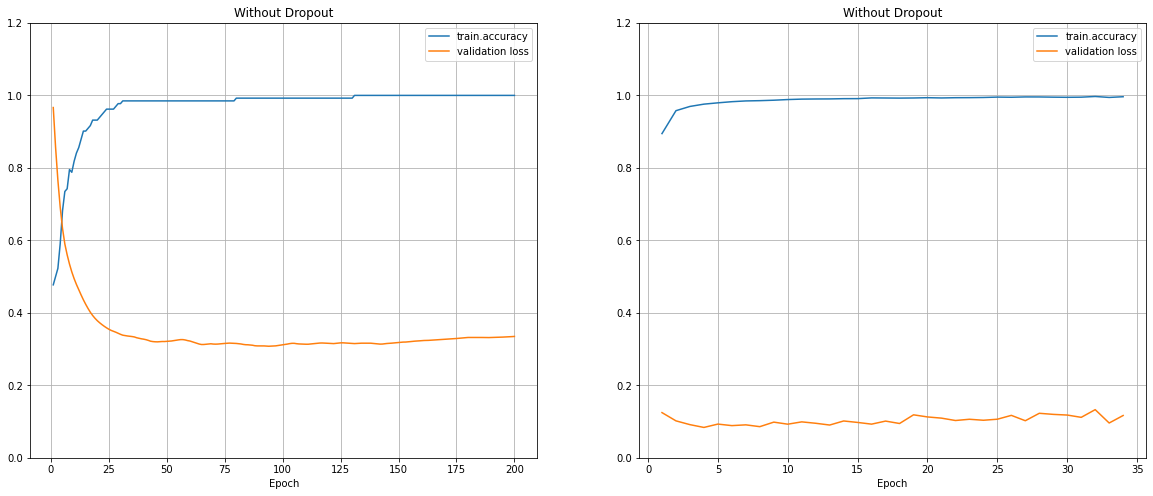

In [206]:
plt.figure(figsize=(20, 8))

plt.subplot(121)
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('Without Dropout')

plt.subplot(122)
plt.plot(xs2, y_acc2, label='train.accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('Without Dropout')

# MNIST 손글씨 - CNN v1

In [209]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [211]:
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [213]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [214]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [225]:
del model

In [226]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 36864)             0         
                                                                 
 dense_91 (Dense)            (None, 512)               18874880  
                                                                 
 dense_92 (Dense)            (None, 10)                5130      
                                                                 
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [227]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [228]:
model_path = 'best_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path,  verbose=1, save_best_only=True)
es = EarlyStopping(patience = 10)

In [229]:
hist1 = model.fit(X_train, Y_train , validation_split=0.2,
                  epochs=1000, batch_size=200, verbose=0,
                  callbacks = [mc, es])


Epoch 1: val_loss improved from inf to 0.29142, saving model to best_mnist_cnn_v1.h5

Epoch 2: val_loss improved from 0.29142 to 0.19637, saving model to best_mnist_cnn_v1.h5

Epoch 3: val_loss improved from 0.19637 to 0.16768, saving model to best_mnist_cnn_v1.h5

Epoch 4: val_loss improved from 0.16768 to 0.12859, saving model to best_mnist_cnn_v1.h5

Epoch 5: val_loss improved from 0.12859 to 0.11760, saving model to best_mnist_cnn_v1.h5

Epoch 6: val_loss improved from 0.11760 to 0.09669, saving model to best_mnist_cnn_v1.h5

Epoch 7: val_loss improved from 0.09669 to 0.09447, saving model to best_mnist_cnn_v1.h5

Epoch 8: val_loss improved from 0.09447 to 0.09372, saving model to best_mnist_cnn_v1.h5

Epoch 9: val_loss did not improve from 0.09372

Epoch 10: val_loss did not improve from 0.09372

Epoch 11: val_loss did not improve from 0.09372

Epoch 12: val_loss improved from 0.09372 to 0.09159, saving model to best_mnist_cnn_v1.h5

Epoch 13: val_loss did not improve from 0.0915

In [232]:
best_model = load_model(model_path)
best_model.evaluate(X_test,  Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0795 - accuracy: 0.9789


[0.0794997289776802, 0.9789000153541565]

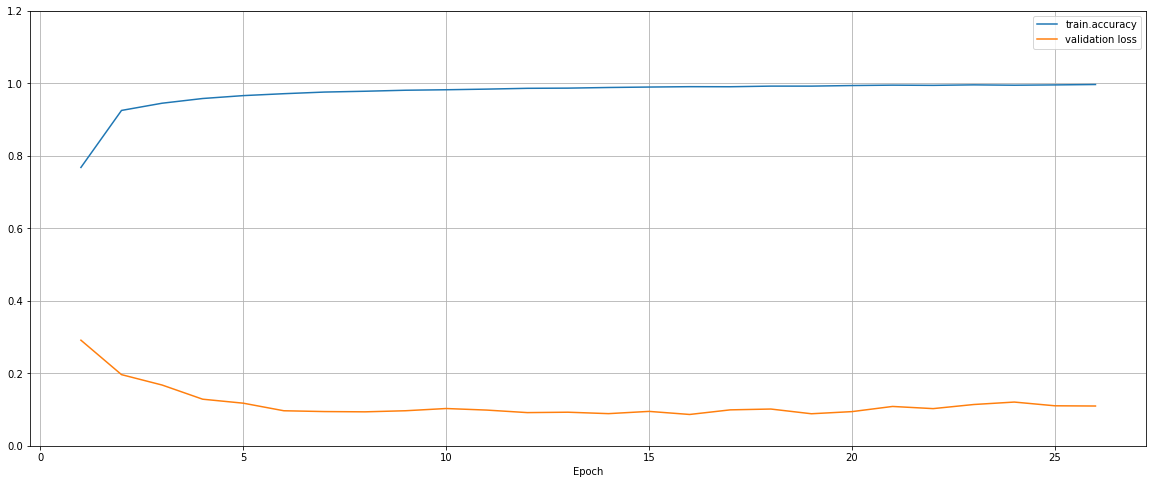

In [233]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()

# MNIST v1까지 완료!